In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools
import pickle
from collections import defaultdict
from IPython.display import HTML
import keras

Using TensorFlow backend.


# Catch

Let's train a model to play catch using a similar algorithm to the one we used from [tic-tac-toe](../sessions/reinforcement.ipynb).

We start with functions to display the board, update the board, and determine game result.

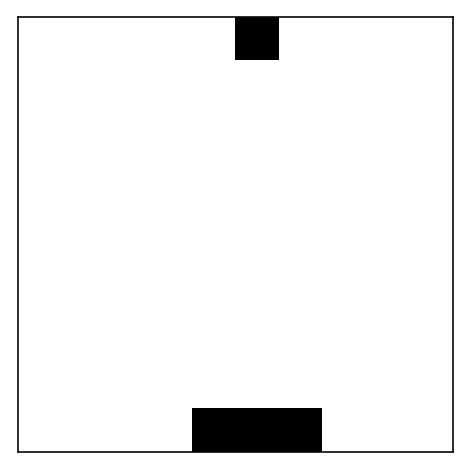

In [2]:
def display(board, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    ax.imshow(board, cmap='gray_r')
    ax.set(xticks=[], yticks=[])

def create_board(size):
    board = np.zeros((size, size), dtype='int')
    n = size//2
    board[0, n] = 1 # rock
    board[-1, n-1:n+2] = 1 # basket
    
    return board

size = 10
board = create_board(size)
display(board)

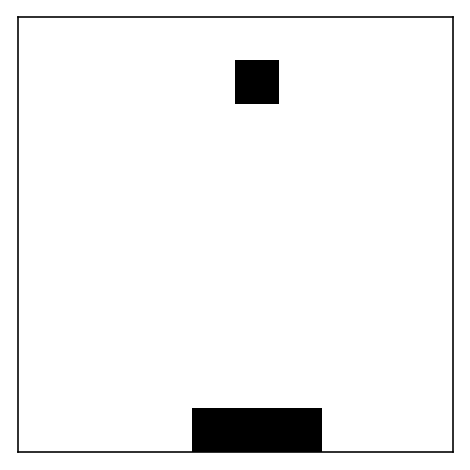

In [3]:
def update_rock(board):
    i, j = np.array(board[:-1,:].nonzero()).squeeze()
    board[i, j] = 0
    board[i + 1, j] = 1

update_rock(board)
display(board)

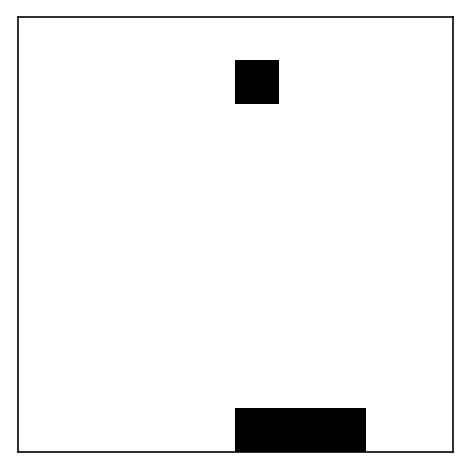

In [4]:
def update_basket(board, move):
    if move == 0: return
    j = board[-1, :].argmax() + 1
    left, right = j-1, j+2
    if left + move < 0:
        move = 0
    elif right + move > board.shape[1]:
        move = 0
    j += move
    board[-1, :] = 0
    board[-1, j-1:j+2] = 1
    
update_basket(board, 1)
display(board)

In [5]:
def is_gameover(board):
    return board[:-1, :].sum() > 0

def get_reward(board):
    if board[-1, :].sum() == 3:
        return 1
    else:
        return -1
    
def random_move():
    return np.random.randint(-1, 2)

reward: -1


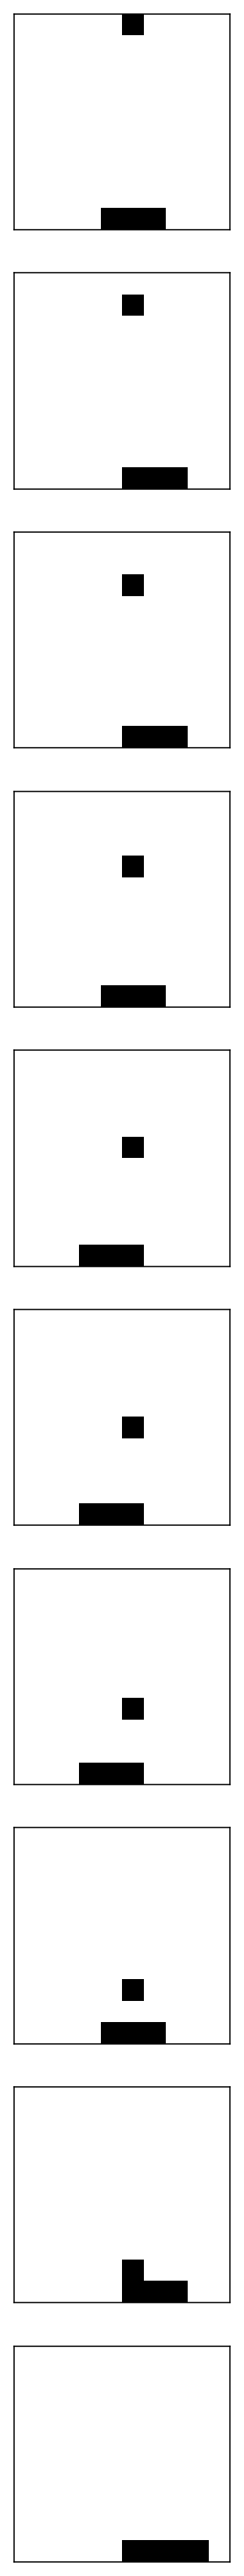

In [6]:
def display_game(boards):
    size = len(boards)
    fig, axes = plt.subplots(size, 1, figsize=(3, 3*size))
    for board, ax in zip(boards, axes):
        display(board, ax=ax)

board = create_board(size)
boards = [board.copy()]
for t in range(size-1):
    move = random_move()
    update_basket(board, move)
    update_rock(board)
    boards.append(board.copy())

display_game(boards)    
print('reward:', get_reward(board))

Now implement a neural network model and train it to play the game. 
A [solution](../solutions/reinforcement.ipynb) is provided.